## Деревья

`pip install binarytree anytree pandas graphviz pydotpuls`

## Бинарные деревья

Сколько точно вершин и листьев в идеальном бинарном дереве?

1. $h = 1$ → $N = 1$, $L = 1$
2. $h = 2$ → $N = 3$, $L = 2$
3. $h = 3$ → $N = 7$, $L = 4$
4. ...

По индукции:

* в дереве высоты $h$ вершин $N = 2^h - 1$ и листьев из них $L = 2^{h-1}$
* для $h + 1$ листьев очевидно будет $L = 2^h$, а вершин — $N = 2^h - 1 + L = 2^h - 1 + 2^h = 2^{h+1} - 1$

In [74]:
import math
import binarytree
import pandas
import random
from typing import List, Tuple

data: List[Tuple[int, int]] = []
r = random.Random()

for c in range(1000):
    height = r.randint(5, 9)
    t = binarytree.bst(height=height)  # мы не разбирались, как она генерирует случайные деревья
    data.append((len(t), height + 1)) # но высотой считает не количество уровней, а максимальную длину пути от корня

df = pandas.DataFrame(data, columns=["N", "h"])
df

,N,h
0,119,8
1,34,6
2,246,10
3,29,7
4,28,6
...,...,...
995,85,8
996,148,9
997,193,9
998,182,9


In [75]:
import numpy as np

@np.vectorize
def ideal_height(n: int) -> float:
    return math.log2(n + 1)

df['h_ideal'] = ideal_height(df['N'])
df['overhead'] = df['h'] / df['h_ideal']

count    1000.000000
mean        1.213513
std         0.067629
min         1.104127
25%         1.169821
50%         1.200000
75%         1.238112
max         1.883271
Name: overhead, dtype: float64

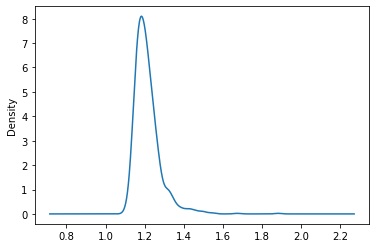

In [76]:
%matplotlib inline

df['overhead'].plot.kde()
df['overhead'].describe()

## Деревья вообще



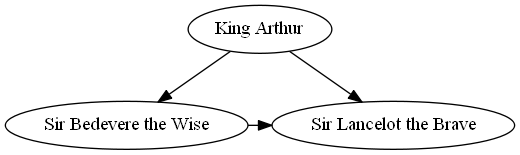

In [77]:
import pydotplus
from IPython.display import Image

gs = '''digraph {
    A [label="King Arthur"]
    B [label="Sir Bedevere the Wise"]
    L [label="Sir Lancelot the Brave"]
    A -> B
    A -> L
    B -> L [constraint=false]
}'''

g = pydotplus.graph_from_dot_data(gs)
Image(g.create_png())

In [78]:
from anytree import Node, RenderTree
from anytree.render import AsciiStyle, ContRoundStyle

root = Node("root")
s0 = Node("sub0", parent=root)
s0b = Node("sub0B", parent=s0)
s0a = Node("sub0A", parent=s0)
s1 = Node("sub1", parent=root)

print(RenderTree(root, style=AsciiStyle()))
print(RenderTree(root, style=ContRoundStyle()))

Node('/root')
|-- Node('/root/sub0')
|   |-- Node('/root/sub0/sub0B')
|   +-- Node('/root/sub0/sub0A')
+-- Node('/root/sub1')
Node('/root')
├── Node('/root/sub0')
│   ├── Node('/root/sub0/sub0B')
│   ╰── Node('/root/sub0/sub0A')
╰── Node('/root/sub1')


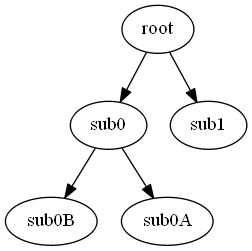

In [81]:
from anytree.dotexport import RenderTreeGraph
import tempfile
import os
tn = tempfile.mktemp('.png')

RenderTreeGraph(root).to_picture(tn)
i = Image(filename=tn)
os.remove(tn)
i